In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_excel('gambung_tea.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14040 entries, 0 to 14039
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   14040 non-null  int64  
 1   MQ3          14040 non-null  int64  
 2   TGS822       14040 non-null  int64  
 3   TGS2602      14040 non-null  int64  
 4   MQ5          14040 non-null  int64  
 5   MQ138        14040 non-null  int64  
 6   TGS2620      14040 non-null  int64  
 7   Score        14040 non-null  float64
 8   Class        14040 non-null  object 
 9   Sampling_id  14040 non-null  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 1.1+ MB


In [3]:
# Separate features (input) and labels (output)
X = data.iloc[:, 1:7]  # Features (6 input variables)
y = data.iloc[:, 8]  # Labels (1 output variable, object type)
y = y.replace({'Cacat Mutu': 'Defect', 'Baik': 'Good'})

# Encode the labels with LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create and train RandomForest classifier
model = RandomForestClassifier()

# Prepare potential parameter values to test
param_grid = {
    'n_estimators': [1000],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Perform GridSearchCV to find the best hyperparameters
# Cross-validation is used here with cv=5
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters are:", grid_search.best_params_)
print("Best score is:", grid_search.best_score_)

Best parameters are: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Best score is: 0.9831098651632459


In [5]:
# Predict the labels for the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred) 
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)

Accuracy: 0.9886039886039886
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1454
           1       0.99      0.99      0.99      2758

    accuracy                           0.99      4212
   macro avg       0.99      0.99      0.99      4212
weighted avg       0.99      0.99      0.99      4212



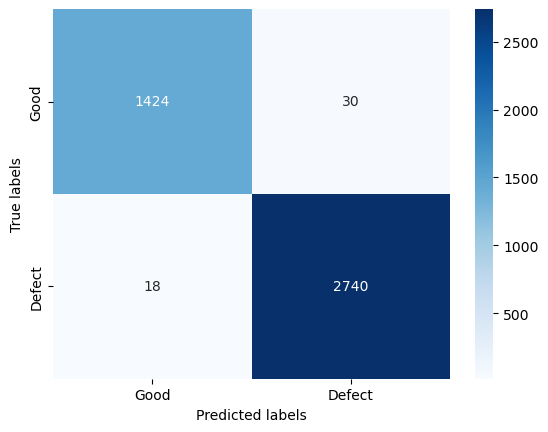

In [6]:
# Visualize the confusion matrix
class_names = ['Good', 'Defect']
sns.heatmap(conf_matrix, annot=True, fmt='.4g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()